# Ángel Barral Díaz

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import scipy.constants as scipy_constants
from math import cos

### Simulation parameters
minS = 50
maxS = 200

m_Z = 92.1876
gamma_Z = 2.4952

nPoints = int(5E7)
##########################


In [6]:
### def BreitWigner(s, m, gamma):
def BreitWigner(s, m, gamma):    
    prob = (1/gamma/np.pi)*gamma**2/((s-m)**2+gamma**2)
    return prob
    


def generateCandidateEnergy(nPoints):


    #We generate energies and random x (0-1)
    s=rd.uniform(minS,maxS,nPoints)
    x=rd.random(nPoints)
    
    #Get the probabilities and the mask to filter:
    p=BreitWigner(s,m_Z, gamma_Z)
    mask=x<=p
    eventsEnergy=s[mask]
    
    return eventsEnergy



def generateCandidateMomenta(energy):
    
    #We asume that is isotropic, is a good asumption as we are considering a decay on a rest particle
    cosphi, costheta = rd.uniform(-1,1,size=len(energy)), rd.uniform(-1,1,size=len(energy))
    sinphi, sintheta = np.sin(np.arccos(cosphi)), np.sin(np.arccos(costheta))

    #Energy should divide equally for the momenta conservation
    E_av=(energy-2*0.000511)/2

    p4_electron=[]
    p4_positron=[]
    
    p4_electron.append(E_av)
    p4_positron.append(E_av)
    
    p4_electron.append(E_av*cosphi*sintheta)
    p4_positron.append(-E_av*cosphi*sintheta)
    
    p4_electron.append(E_av*sinphi*sintheta)
    p4_positron.append(-E_av*sintheta*sinphi)
    
    p4_electron.append(E_av*costheta)
    p4_positron.append(-E_av*costheta)
    
    #We get the momentas and the cosine of theta
    return  p4_electron, p4_positron, costheta

def generateEvents(nPoints):
    energy = generateCandidateEnergy(nPoints)
    data = generateCandidateMomenta(energy)
    return data

def invMass(p4):
    
    m2=p4[0]**2-p4[1]**2-p4[2]**2-p4[3]**2
    m=np.sqrt(m2)
    
    return m


# Questions discusion
### assume the decay is isotropic. Is this a correct assumption? - check on some particle physics lecture
### plot histogram of $cos(\theta)$ of electrons momentum. What shape is expected for isotropic distribution?

The angle distribution int $\theta$ is expected to be uniform as the initial $Z^0$ bosson was static so no direction should be prefered. Thus this, the $cos(\theta)$ distribution should be also uniform as no angles are prefered

### generate at least 500k events. How long it takes? What is the generation effciency?

In [9]:
%%time

energies=generateCandidateEnergy(nPoints)
p4_electron, p4_positron, costheta = generateEvents(nPoints)
m = invMass(p4_electron + p4_positron)
print("Generated {} events for {} tries.".format(m.shape[0], nPoints))
print("Generation Efficiency: {:3.2f}".format(float(m.shape[0])/nPoints))


Generated 324954 events for 50000000 tries.
Generation Efficiency: 0.01
CPU times: user 1.25 s, sys: 333 ms, total: 1.58 s
Wall time: 1.58 s


/tmp/ipykernel_4895/1027041687.py:59: RuntimeWarning: invalid value encountered in sqrt
  m=np.sqrt(m2)


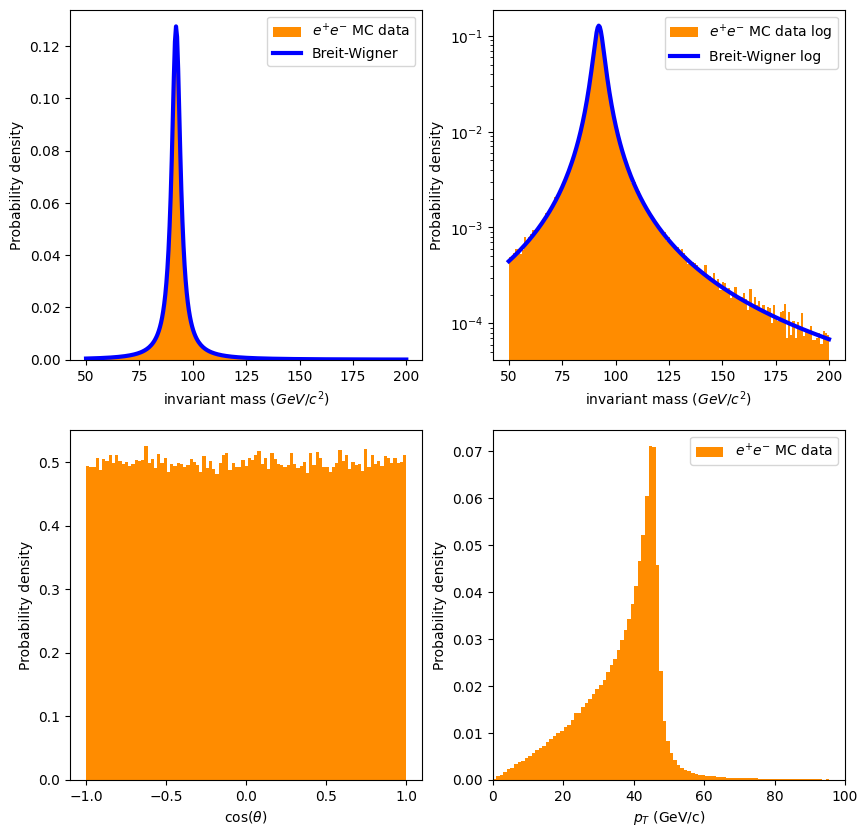

In [11]:
#Now we proceed with the plots
fig, ax = plt.subplots(2,2,figsize=(10,10))

#We generate a space of points to plot the theoretical formula plots
s=np.linspace(50,200,300)

ax[0,0].hist(energies,color='darkorange',bins=np.linspace(50,200,150),  density=1, label='$e^{+}e^{-}$ MC data')
ax[0,0].plot(s,BreitWigner(s,m_Z,gamma_Z), linewidth=3, color='blue',label='Breit-Wigner')
ax[0,0].legend(loc='best')
ax[0,0].set_ylabel("Probability density")
ax[0,0].set_xlabel("invariant mass $(GeV/c^2)$")

ax[0,1].hist(energies,color='darkorange',bins=np.linspace(50,200,150), density=1, label='$e^{+}e^{-}$ MC data log')
ax[0,1].plot(s,BreitWigner(s,m_Z,gamma_Z), linewidth=3, color='b',label='Breit-Wigner log')
ax[0,1].legend(loc='best')
ax[0,1].set_yscale("log")
ax[0,1].set_ylabel("Probability density")
ax[0,1].set_xlabel("invariant mass $(GeV/c^2)$")

ax[1,0].hist(costheta, color='darkorange',bins=np.linspace(-1,1,100), density=1)
ax[1,0].set_xlabel("cos($\\theta$)")
ax[1,0].set_ylabel("Probability density")

ax[1,1].hist(np.sqrt(p4_electron[2]**2+p4_electron[1]**2), bins=np.linspace(0,200,200), \
            color='darkorange', label='$e^{+}e^{-}$ MC data', density=1)
ax[1,1].legend(loc='best')
ax[1,1].set_xlim(0,100)
ax[1,1].set_ylabel("Probability density")
ax[1,1].set_xlabel("$p_T$ (GeV/c)")


plt.show()